In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 2
#order = ['Memory B cell',  'CD8 effector','NK','Naive B cell','Naive CD8','CD8 central memory','Plasma','Mono', 'CD8 effector memory', 'Tregs','Naive CD4',
        #'CD4 effector memory','CD4 central memory']
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/melanoma_EMseq_thirdbatch/combined_result/deconresult_gt/method1Fract_CD8TIL_pbl_tum_all_matrix_allout_ranked_SM_top100_SM_unique_result_posscore.txt_CSxOut.txt_yale3rdbatch_gt.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

values = ['NDB','DCB']

order=df.columns.tolist()
order.remove('Toxicity')
#order.remove('Total')
order.remove('Response')

In [3]:
df = (df[df['Response'].notna()]).copy()

In [4]:

df['Toxic'] = df['Response']
df

,NaiveCD4,NaiveCD8,nB,NK,Mono,M0,M1,M2,iDC,mDC,...,em4,ed8,Mg,cm4,Er,mB,CD8TIL,Response,Toxicity,Toxic
Mixture,,,,,,,,,,,,,,,,,,,,,
YUAMPLE-21-4224-auto,3.052602,3.250449,3.472725,3.773785,5.161924,4.878782,4.366808,4.046724,4.335324,3.310743,...,3.364747,3.619032,10.477262,3.140812,8.066267,2.967078,4.663544,DCB,NaN,DCB
YUBOISE-21-4256-auto,3.328503,3.179784,3.669113,3.927570,4.613357,4.381386,4.102404,3.702423,4.322083,3.911184,...,3.743952,3.706992,9.922004,3.445895,8.024668,3.133824,4.209725,NDB,NaN,NDB
YUDUCO-21-4244-auto,3.314601,3.227326,3.634292,3.771804,4.207140,4.864733,4.597184,4.203494,4.081281,3.716045,...,3.797913,3.428293,9.206463,3.789545,8.118080,2.939544,4.179363,DCB,NaN,DCB
YUHARP-21-4291-auto,3.735777,3.328849,3.631782,3.637145,4.348431,4.983042,4.704709,4.398761,4.203220,3.820979,...,4.708047,3.691402,7.454050,4.028624,5.912206,3.203363,4.357128,DCB,NaN,DCB
YUHELIX-12-2576-auto,2.861215,2.794248,3.499187,3.128219,4.494600,4.664984,3.395204,3.171977,4.526045,3.781587,...,3.170517,3.132503,4.334053,2.996631,3.567590,2.972710,5.050989,DCB,3.0,DCB
YUKUW-21-4198-auto,3.738149,3.573478,3.816007,3.588620,4.154580,4.737396,4.191178,3.998813,3.947633,3.425817,...,4.340767,3.689544,8.629920,3.732644,6.905098,3.123884,4.294387,DCB,NaN,DCB
YUKYOTO-21-4372-auto,3.344084,3.428051,3.770649,3.930918,5.100686,4.689135,4.360236,3.954174,4.389813,3.533919,...,3.496271,3.775134,8.721875,3.350352,7.341728,3.499635,4.164990,NDB,NaN,NDB
YUMAZO-21-4275-auto,2.876181,3.022747,3.330539,3.483589,5.276490,5.207084,4.333918,3.641310,4.518658,3.614890,...,3.745616,3.242565,10.203213,3.403691,8.088842,2.757971,4.207579,DCB,NaN,DCB
YUMUZEL-21-4351-auto,3.399978,3.594344,4.254167,3.860480,5.647490,4.836035,4.207257,3.914493,4.247608,3.482309,...,3.662593,3.700881,5.915691,3.512846,5.361393,3.695704,4.267262,DCB,NaN,DCB


In [5]:
p_vals = {}
for cell in order:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        multi = 1
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
        if np.mean(p_val_list[0]) >= np.mean(p_val_list[1]):
            multi = -1
        p_vals[cell] = -np.log10(mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]) * multi
        
p_vals

{'NaiveCD4': -0.30979483308853195,
 'NaiveCD8': -0.5044170346212903,
 'nB': 0.10202861856237917,
 'NK': -0.8191222787307998,
 'Mono': -0.30979483308853195,
 'M0': -0.1486687294316775,
 'M1': -0.19878495837761379,
 'M2': -0.05876996547590852,
 'iDC': 0.30979483308853195,
 'mDC': -0.5044170346212903,
 'PMN': 0.10202861856237917,
 'cm8': 0.10202861856237917,
 'em8': -0.05876996547590852,
 'Eo': 0.01879196705527539,
 'Tregs': 0.4357005412928069,
 'em4': 0.10202861856237917,
 'ed8': -0.19878495837761379,
 'Mg': 0.01879196705527539,
 'cm4': -0.01879196705527539,
 'Er': -0.10202861856237917,
 'mB': -0.30979483308853195,
 'CD8TIL': 0.30979483308853195}

In [6]:
type(p_vals)
p_vals={k: v for k, v in sorted(p_vals.items(), key=lambda item: item[1])}
print(p_vals)
order=p_vals.keys()
print(order)

{'NK': -0.8191222787307998, 'NaiveCD8': -0.5044170346212903, 'mDC': -0.5044170346212903, 'NaiveCD4': -0.30979483308853195, 'Mono': -0.30979483308853195, 'mB': -0.30979483308853195, 'M1': -0.19878495837761379, 'ed8': -0.19878495837761379, 'M0': -0.1486687294316775, 'Er': -0.10202861856237917, 'M2': -0.05876996547590852, 'em8': -0.05876996547590852, 'cm4': -0.01879196705527539, 'Eo': 0.01879196705527539, 'Mg': 0.01879196705527539, 'nB': 0.10202861856237917, 'PMN': 0.10202861856237917, 'cm8': 0.10202861856237917, 'em4': 0.10202861856237917, 'iDC': 0.30979483308853195, 'CD8TIL': 0.30979483308853195, 'Tregs': 0.4357005412928069}
dict_keys(['NK', 'NaiveCD8', 'mDC', 'NaiveCD4', 'Mono', 'mB', 'M1', 'ed8', 'M0', 'Er', 'M2', 'em8', 'cm4', 'Eo', 'Mg', 'nB', 'PMN', 'cm8', 'em4', 'iDC', 'CD8TIL', 'Tregs'])


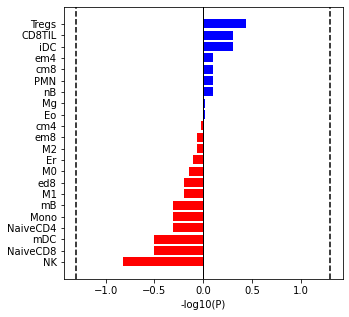

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for cell in order:
    y = p_vals[cell]
    if y <= 0:
        ax.barh(cell, y, color='r')
    else:
        ax.barh(cell, y, color='b')
        
ax.axvline(linewidth=1, color='k')
ax.axvline(x=-np.log10(0.05), linewidth=1.5, color='k', ls='--')
ax.axvline(x=np.log10(0.05), linewidth=1.5, color='k', ls='--')

#ax.annotate('P < 0.05', (0.85, 10), fontsize=12)
#ax.annotate('P < 0.05', (-1, 10), fontsize=12)
ax.set_xlabel('-log10(P)')
plt.savefig(file+'_response_barplot_mean.pdf', bbox_inches='tight')